In [1]:
import pandas as pd
import numpy as np
import os
import sqlite3
import shutil
import datetime
import geopandas as gpd
import matplotlib.pyplot as plt
import csv

In [2]:
df_ipm = gpd.read_file('data/ipm_regions_simple.geojson')
df_ipm = df_ipm.to_crs('EPSG:4326')
df_ipm.loc[:,'large_region'] = df_ipm['IPM_Region'].apply(lambda x: x.split('_')[0])
df_ipm.head()

,IPM_Region,geometry,large_region
0,ERC_PHDL,"MULTIPOLYGON (((-101.04116 33.83362, -100.5187...",ERC
1,ERC_REST,"MULTIPOLYGON (((-97.19964 26.00022, -97.19874 ...",ERC
2,ERC_WEST,"MULTIPOLYGON (((-99.51275 31.42489, -99.51178 ...",ERC
3,FRCC,"MULTIPOLYGON (((-81.96356 24.52108, -81.96500 ...",FRCC
4,MIS_AMSO,"MULTIPOLYGON (((-89.41370 28.92073, -89.41421 ...",MIS


In [3]:
#from https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html (division file)
df_census = gpd.read_file('cb_2018_us_division_20m')
df_census = df_census.to_crs("EPSG:4326")
df_census.head()

,DIVISIONCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,1,0300000US1,1,New England,69,162376417481,24072855206,"MULTIPOLYGON (((-68.92401 43.88540, -68.87479 ..."
1,2,0300000US2,2,Middle Atlantic,69,256981418064,26186444931,"MULTIPOLYGON (((-72.01892 41.27411, -71.92680 ..."
2,3,0300000US3,3,East North Central,69,629289745590,151252485939,"MULTIPOLYGON (((-82.86333 41.69369, -82.82571 ..."
3,4,0300000US4,4,West North Central,69,1314707528663,33020781573,"POLYGON ((-104.05770 44.99743, -104.03914 44.9..."
4,5,0300000US5,5,South Atlantic,69,687099317084,71741527671,"MULTIPOLYGON (((-76.04621 38.02553, -76.00733 ..."


In [4]:
#from https://hifld-geoplatform.opendata.arcgis.com/datasets/6b2af23c67f04f4cb01d88c61aaf558a_0
df_nerc = gpd.read_file('NERC_Regions-shp/')
df_nerc = df_nerc.to_crs("EPSG:4326")
df_nerc.head()

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,COUNTRY,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,SUBNAME,SHAPE_Leng,SHAPE_Area,geometry
0,1,1,WESTERN ELECTRICITY COORDINATING COUNCIL (WECC),155 NORTH 400 WEST SUITE 200,SALT LAKE CITY,UT,84103,USA,"EIA 861, https://www.nerc.com/, https://www.ne...",2010-10-01,OTHER,2020-05-15,https://www.wecc.biz/Pages/home.aspx,AZ-NM-SNV,5.664517e+06,8.498212e+11,"POLYGON ((-110.49077 37.00374, -110.47757 36.9..."
1,2,2,WESTERN ELECTRICITY COORDINATING COUNCIL (WECC),156 NORTH 400 WEST SUITE 200,SALT LAKE CITY,UT,84103,USA,"EIA 861, https://www.nerc.com/, https://www.ne...",2010-10-01,OTHER,2020-05-15,https://www.wecc.biz/Pages/home.aspx,CA-MX US,6.630059e+06,5.793996e+11,"MULTIPOLYGON (((-117.12871 32.62193, -117.1297..."
2,3,3,TEXAS RELIABILITY ENTITY (TRE),800 AIRPORT ROAD,TAYLOR,TX,76574,USA,"EIA 861, https://www.nerc.com/, https://www.ne...",2010-10-01,OTHER,2020-05-15,http://www.ercot.com/,ERCOT,1.152261e+07,7.156840e+11,"MULTIPOLYGON (((-97.22168 25.98203, -97.22194 ..."
3,4,4,FLORIDA RELIABILITY COORDINATING COUNCIL (FRCC),"3000 BAYPORT DRIVE, SUITE 600",TAMPA,FL,33607,USA,"EIA 861, https://www.nerc.com/, https://www.ne...",2010-10-01,OTHER,2020-05-15,https://www.frcc.com/default.aspx,FRCC,1.389346e+07,1.646775e+11,"MULTIPOLYGON (((-81.96328 24.52140, -81.96359 ..."
4,5,5,NORTHEAST POWER COORDINATING COUNCIL (NPCC),"1040 AVENUE OF THE AMERICAS, 10TH FLOOR",NEW YORK,NY,10018,USA,"EIA 861, https://www.nerc.com/, https://www.ne...",2010-10-01,OTHER,2020-05-15,https://www.npcc.org/default.aspx,NEW ENGLAND,9.169736e+06,3.334812e+11,"MULTIPOLYGON (((-73.62303 40.98395, -73.62305 ..."


In [5]:
df_states = gpd.read_file('cb_2018_us_state_500k')
df_states = df_states.to_crs("EPSG:4326")
df_states.head()


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72680 35.93584, -75.71826 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74240 37.80835, -75.74150 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


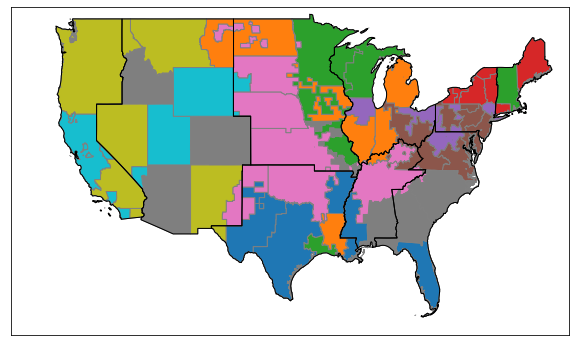

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
df_ipm.plot(ax=ax, column='IPM_Region', edgecolor='grey')
df_census.plot(ax=ax, edgecolor='k', facecolor='None')
ax.set_ylim([23, 50])
ax.set_xlim([-130, -65])
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('census_ipm_regions.jpg', dpi=400)

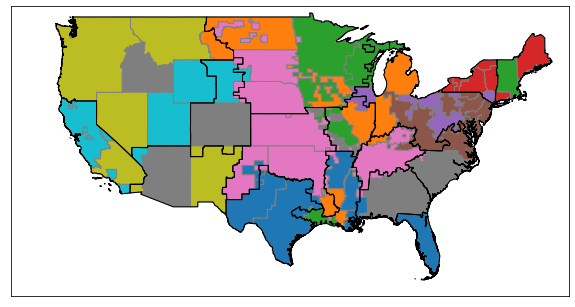

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
df_ipm.plot(ax=ax, column='IPM_Region', edgecolor='grey')
df_nerc.plot(ax=ax, edgecolor='k', facecolor='None')
ax.set_ylim([23, 50])
ax.set_xlim([-130, -65])
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('nerc_ipm_regions.jpg', dpi=400)

In [8]:
df_ipm['coords'] = df_ipm['geometry'].apply(lambda x: x.representative_point().coords[:])
df_ipm['coords'] = [df_ipm[0] for df_ipm in df_ipm['coords']]

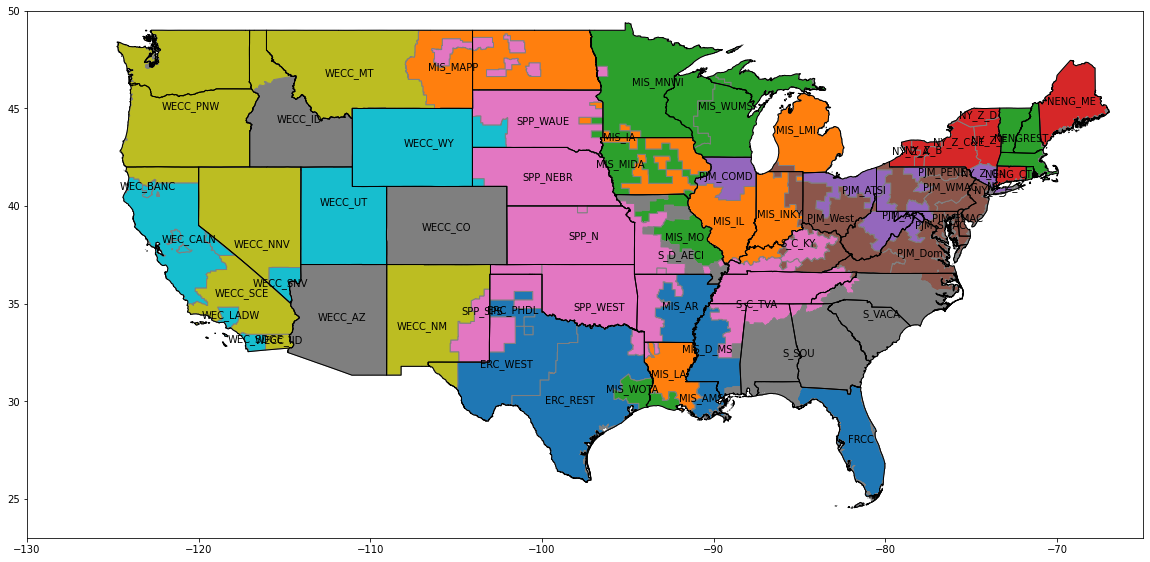

In [9]:
fig, ax = plt.subplots(figsize=(20,20))
df_ipm.plot(ax=ax, column='IPM_Region', edgecolor='grey')
df_states.plot(ax=ax, edgecolor='k', facecolor='None')
ax.set_ylim([23, 50])
ax.set_xlim([-130, -65])
#ax.set_xticks([])
#ax.set_yticks([])
for idx, row in df_ipm.iterrows():
    plt.annotate(text=row['IPM_Region'], xy=row['coords'],horizontalalignment='center')
plt.savefig('state_ipm_regions.jpg', dpi=400)

/Users/aranyavenkatesh/opt/anaconda3/envs/powergenome/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


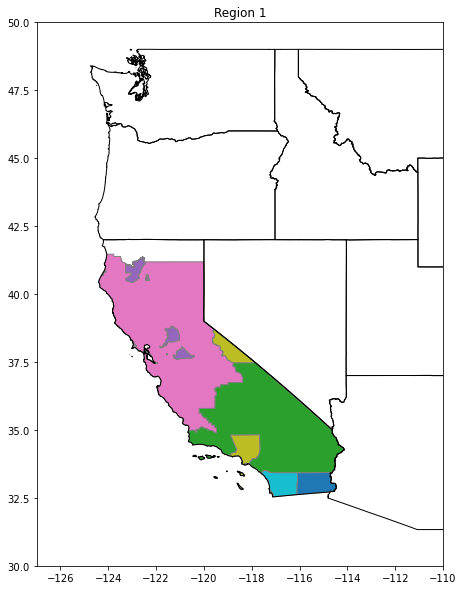

In [10]:
df_reg1 = df_ipm.loc[df_ipm.loc[:,'IPM_Region'].apply(lambda x: 'WEC_' in x
                                                      or 'SCE' in x or 'IID' in x),:]
fig, ax = plt.subplots(figsize=(10,10))
df_reg1.plot(ax=ax, column='IPM_Region', edgecolor='grey')
df_states.plot(ax=ax, edgecolor='k', facecolor='None')
ax.set_ylim([30, 50])
ax.set_xlim([-127, -110])
plt.title('Region 1')
df_reg1.loc[:,'Region'] =1

/Users/aranyavenkatesh/opt/anaconda3/envs/powergenome/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


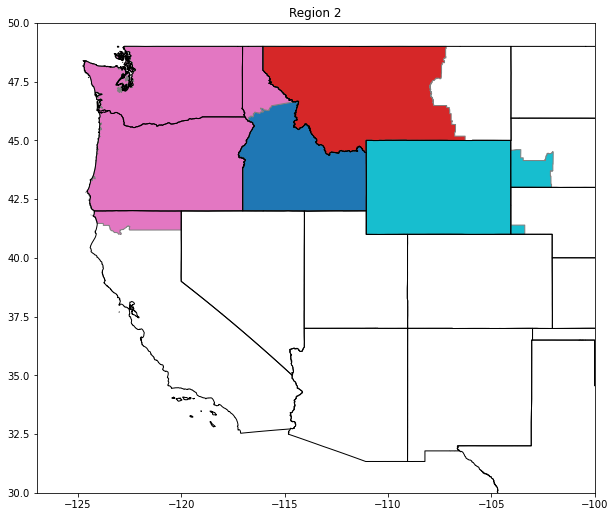

In [11]:
df_reg2 = df_ipm.loc[df_ipm.loc[:,'IPM_Region'].apply(lambda x: 'PNW' in x or '_ID' in x 
                                                      or 'WY' in x or 'MT' in x),:]
fig, ax = plt.subplots(figsize=(10,10))
df_reg2.plot(ax=ax, column='IPM_Region', edgecolor='grey')
df_states.plot(ax=ax, edgecolor='k', facecolor='None')
ax.set_ylim([30, 50])
ax.set_xlim([-127, -100])
plt.title('Region 2')
df_reg2.loc[:,'Region'] =2

/Users/aranyavenkatesh/opt/anaconda3/envs/powergenome/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


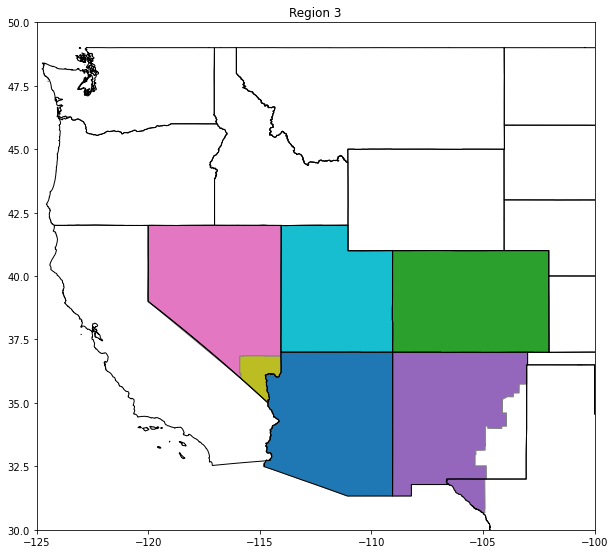

In [12]:
df_reg3 = df_ipm.loc[df_ipm.loc[:,'IPM_Region'].apply(lambda x: 'AZ' in x or 'UT' in x or 'WECC_CO' in x
                                                     or 'SNV' in x or 'NNV' in x or 'NM' in x),:]
fig, ax = plt.subplots(figsize=(10,10))
df_reg3.plot(ax=ax, column='IPM_Region', edgecolor='grey')
df_states.plot(ax=ax, edgecolor='k', facecolor='None')
ax.set_ylim([30, 50])
ax.set_xlim([-125, -100])
plt.title('Region 3')
df_reg3.loc[:,'Region'] =3

/Users/aranyavenkatesh/opt/anaconda3/envs/powergenome/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


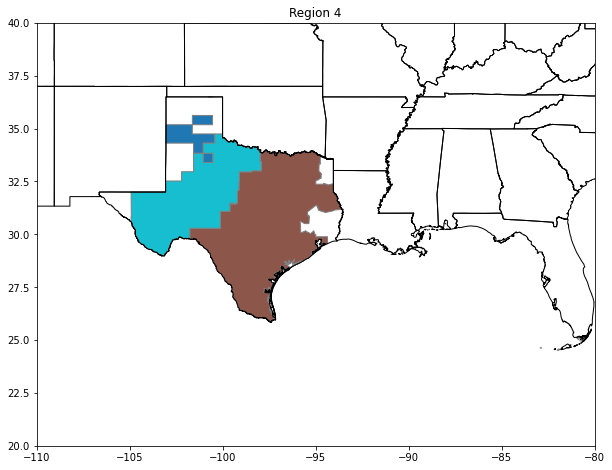

In [13]:
df_reg4 = df_ipm.loc[df_ipm.loc[:,'IPM_Region'].apply(lambda x: 'ERC' in x),:]
fig, ax = plt.subplots(figsize=(10,10))
df_reg4.plot(ax=ax, column='IPM_Region', edgecolor='grey')
df_states.plot(ax=ax, edgecolor='k', facecolor='None')
ax.set_ylim([20, 40])
ax.set_xlim([-110, -80])
plt.title('Region 4')
df_reg4.loc[:,'Region'] =4

/Users/aranyavenkatesh/opt/anaconda3/envs/powergenome/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


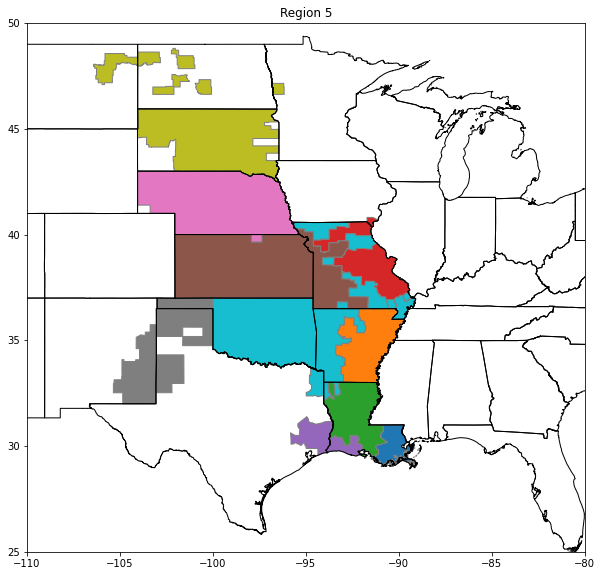

In [14]:
df_reg5 = df_ipm.loc[df_ipm.loc[:,'IPM_Region'].apply(lambda x: 'SPP' in x
                                                     or 'MIS_AR' in x or 'AECI' in x
                                                     or 'MIS_MO' in x or 'MIS_WOTA' in x
                                                     or 'MIS_LA' in x 
                                                     or 'MIS_AM' in x),:]
fig, ax = plt.subplots(figsize=(10,10))
df_reg5.plot(ax=ax, column='IPM_Region', edgecolor='grey')
df_states.plot(ax=ax, edgecolor='k', facecolor='None')
ax.set_ylim([25, 50])
ax.set_xlim([-110, -80])
plt.title('Region 5')
df_reg5.loc[:,'Region'] =5

/Users/aranyavenkatesh/opt/anaconda3/envs/powergenome/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


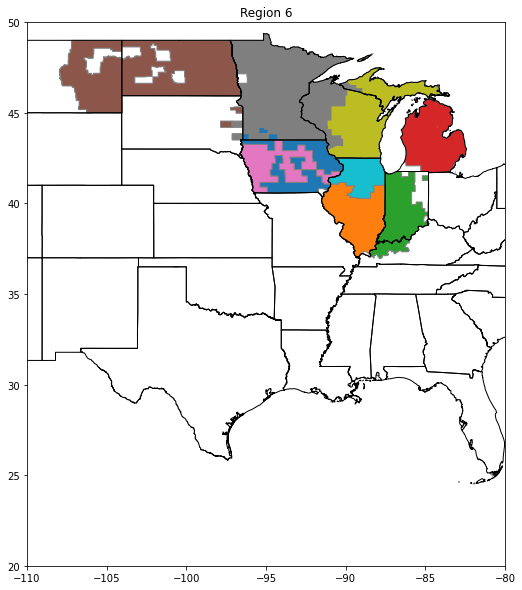

In [15]:
df_reg6 = df_ipm.loc[df_ipm.loc[:,'IPM_Region'].apply(lambda x: 'MIS_MAPP' in x
                                                     or 'COMD' in x or 'MIS_MNWI' in x
                                                     or 'MIS_WUMS' in x or 'MIS_IA' in x
                                                     or 'MIS_MIDA' in x or 'MIS_IL' in x
                                                     or 'MIS_INKY' in x or 'MIS_LMI' in x),:]
fig, ax = plt.subplots(figsize=(10,10))
df_reg6.plot(ax=ax, column='IPM_Region', edgecolor='grey')
df_states.plot(ax=ax, edgecolor='k', facecolor='None')
ax.set_ylim([20, 50])
ax.set_xlim([-110, -80])
plt.title('Region 6')
df_reg6.loc[:,'Region'] =6

/Users/aranyavenkatesh/opt/anaconda3/envs/powergenome/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


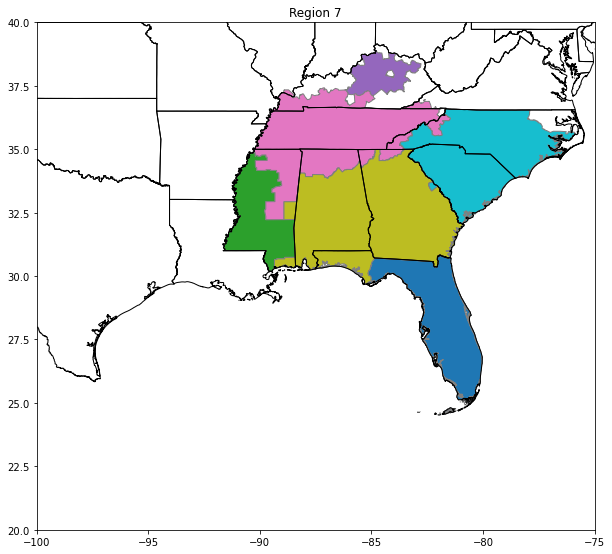

In [16]:
df_reg7 = df_ipm.loc[df_ipm.loc[:,'IPM_Region'].apply(lambda x: 'S_VACA' in x or 'S_SOU' in x
                                                     or 'FRCC' in x or 'TVA' in x
                                                     or '_MS' in x or 'S_C_KY' in x
                                                     or 'TX' in x 
                                                      ),:]
fig, ax = plt.subplots(figsize=(10,10))
df_reg7.plot(ax=ax, column='IPM_Region', edgecolor='grey')
df_states.plot(ax=ax, edgecolor='k', facecolor='None')
ax.set_ylim([20, 40])
ax.set_xlim([-100, -75])
plt.title('Region 7')
df_reg7.loc[:,'Region'] =7

/Users/aranyavenkatesh/opt/anaconda3/envs/powergenome/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


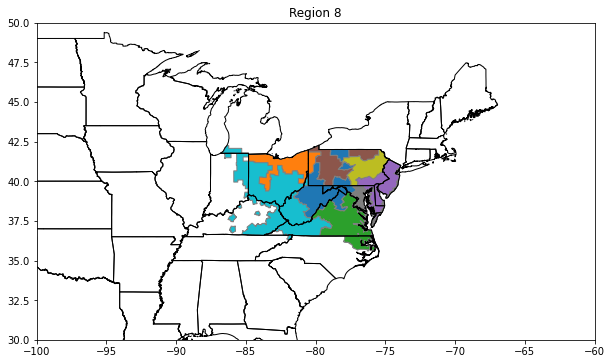

In [17]:
df_reg8 = df_ipm.loc[df_ipm.loc[:,'IPM_Region'].apply(lambda x: 'PJM' in x and 'COMD' not in x),:]
fig, ax = plt.subplots(figsize=(10,10))
df_reg8.plot(ax=ax, column='IPM_Region', edgecolor='grey')
df_states.plot(ax=ax, edgecolor='k', facecolor='None')
ax.set_ylim([30,50])
ax.set_xlim([-100, -60])
plt.title('Region 8')
df_reg8.loc[:,'Region'] = 8

/Users/aranyavenkatesh/opt/anaconda3/envs/powergenome/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


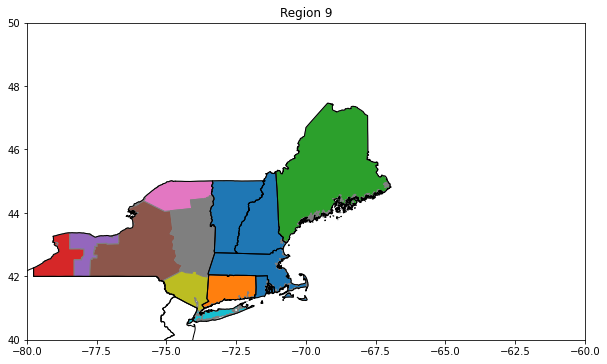

In [18]:
df_reg9 = df_ipm.loc[df_ipm.loc[:,'IPM_Region'].apply(lambda x: 'ENG' in x or 'NY' in x),:]
fig, ax = plt.subplots(figsize=(10,10))
df_reg9.plot(ax=ax, column='IPM_Region', edgecolor='grey')
df_states.plot(ax=ax, edgecolor='k', facecolor='None')
ax.set_ylim([40,50])
ax.set_xlim([-80, -60])
plt.title('Region 9')
df_reg9.loc[:,'Region'] =9

In [19]:
df_reg9

,IPM_Region,geometry,large_region,coords,Region
18,NENG_CT,"MULTIPOLYGON (((-73.62286 40.98370, -73.62480 ...",NENG,"(-72.80752062207503, 41.511723879103776)",9
19,NENG_ME,"MULTIPOLYGON (((-70.60849 42.97769, -70.60849 ...",NENG,"(-69.15954034190442, 45.26062198896369)",9
20,NENGREST,"MULTIPOLYGON (((-71.56974 41.22537, -71.55424 ...",NENGREST,"(-72.07911640062466, 43.30315510312558)",9
21,NY_Z_A,"MULTIPOLYGON (((-78.90518 42.93351, -78.90079 ...",NY,"(-78.50405907955025, 42.679438503933866)",9
22,NY_Z_B,"MULTIPOLYGON (((-76.94668 43.25894, -76.94519 ...",NY,"(-77.78057544528235, 42.71748050052474)",9
23,NY_Z_C&E,"MULTIPOLYGON (((-76.18704 43.66566, -76.18413 ...",NY,"(-75.72719199590071, 43.11932151582535)",9
24,NY_Z_D,"MULTIPOLYGON (((-75.84551 44.39670, -75.84634 ...",NY,"(-74.5976751295588, 44.529050498531745)",9
25,NY_Z_F,"POLYGON ((-73.49688 42.04968, -73.52143 42.049...",NY,"(-73.98096879342563, 43.23015998574478)",9
26,NY_Z_G-I,"MULTIPOLYGON (((-73.76548 40.87745, -73.76569 ...",NY,"(-74.27275298144754, 41.529575538630276)",9
27,NY_Z_J,"MULTIPOLYGON (((-74.20241 40.57956, -74.20106 ...",NY,"(-73.86719565158079, 40.68594697577239)",9


In [20]:
df_concat_IPM = pd.concat([df_reg1, df_reg2, df_reg3, df_reg4, df_reg5, df_reg6, df_reg7, df_reg8, df_reg9])
print(len(df_concat_IPM), len(df_concat_IPM.IPM_Region.unique()))
print(len(df_ipm))

64 64
64


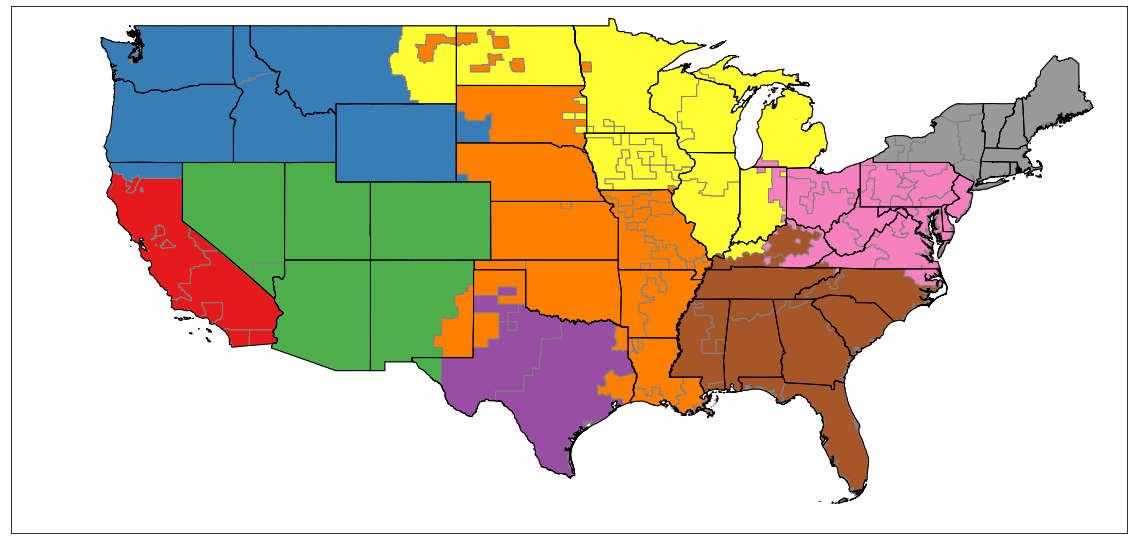

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
df_concat_IPM.plot(ax=ax, column='Region', edgecolor='grey',cmap='Set1')
df_states.plot(ax=ax, edgecolor='k', facecolor='None')
ax.set_ylim([23, 50])
ax.set_xlim([-130, -65])
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('IPM_regions_to_temoa_state_groups.jpg', dpi=400)

In [22]:
df_states.loc[:,'Region'] = 0
#region 1
df_states.loc[df_states.loc[:,'STUSPS'].apply(lambda x: 'CA' in x ),'Region'] = 1
#region 2
df_states.loc[df_states.loc[:,'STUSPS'].apply(lambda x: 'OR' in x 
                                              or 'WA' in x or 'ID' in x
                                              or 'MT' in x or 'WY' in x),'Region'] = 2
#region 3
df_states.loc[df_states.loc[:,'STUSPS'].apply(lambda x: 'NV' in x or 'UT' in x 
                                              or 'AZ' in x or 'CO' in x or 'NM' in x),'Region'] = 3
#region 4
df_states.loc[df_states.loc[:,'STUSPS'].apply(lambda x: 'TX' in x),'Region'] = 4
#region 5
df_states.loc[df_states.loc[:,'STUSPS'].apply(lambda x: 'OK' in x or 'KS' in x 
                                              or 'AR' in x or 'MO' in x
                                             or 'SD' in x or 'NE' in x
                                             or 'LA' in x),'Region'] = 5
#region 6:
df_states.loc[df_states.loc[:,'STUSPS'].apply(lambda x: 'IL' in x or 'IN' in x or 'MI' in x
                                             or 'IA' in x or 'ND' in x
                                             or 'WI' in x or 'MN' in x),'Region'] = 6
#region 7
df_states.loc[df_states.loc[:,'STUSPS'].apply(lambda x: 'FL' in x or 'GA' in x or 'AL' in x or 'TN' in x
                                              or 'SC' in x or 'NC' in x or 'KY' in x
                                              or 'MS' in x),'Region'] = 7


#region 8:
df_states.loc[df_states.loc[:,'STUSPS'].apply(lambda x: 'NJ' in x or 'PA' in x or 'OH' in x
                                             or 'WV' in x or 'VA' in x 
                                             or 'DE' in x or 'MD' in x or 'DC' in x),'Region'] = 8
#region 9:
df_states.loc[df_states.loc[:,'STUSPS'].apply(lambda x: 'VT' in x or 'NH' in x or 'RI' in x or 'NY' in x
                                              or 'MA' in x or 'CT' in x or 'ME' in x),'Region'] = 9
df_states = df_states[df_states.Region!=0]

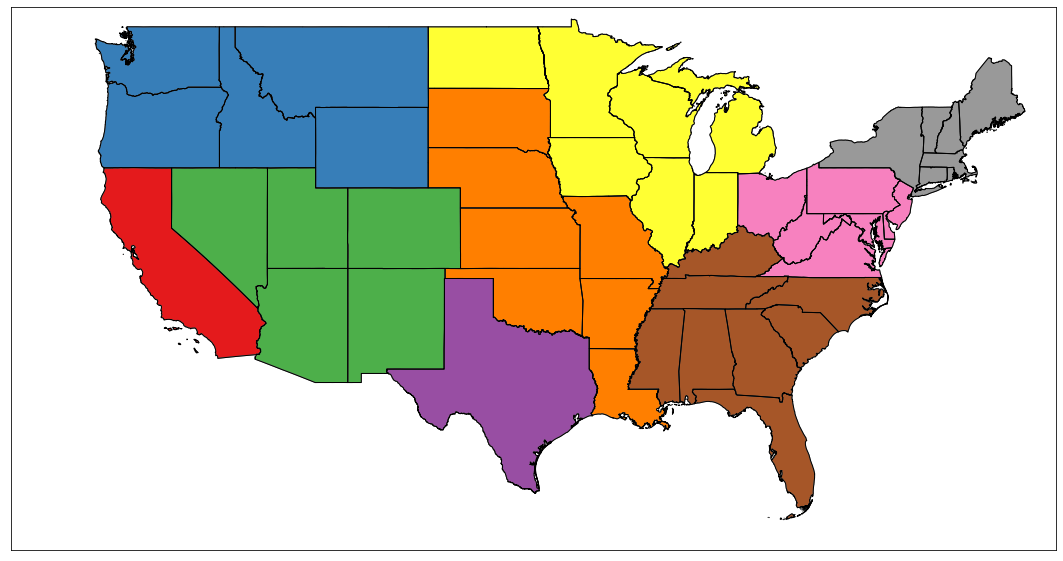

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
df_states.plot(ax=ax, column='Region', edgecolor='grey',cmap='Set1')
df_states.plot(ax=ax, edgecolor='k', facecolor='None')
ax.set_ylim([23, 50])
ax.set_xlim([-130, -65])
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('states_to_temoa_state_groups.jpg', dpi=400)

In [24]:
df_concat_IPM = df_concat_IPM.loc[:,['IPM_Region', 'Region', 'geometry']]
gdf_concat_IPM = gpd.GeoDataFrame(df_concat_IPM, crs='EPSG:4326')
gdf_concat_IPM.to_file('mapping_IPM_regions_to_temoa_state_groups.geojson', driver="GeoJSON")

In [25]:
gdf_states = gpd.GeoDataFrame(df_states, crs='EPSG:4326')
gdf_states.to_file('mapping_states_to_temoa_state_groups.geojson', driver="GeoJSON")

In [26]:
dict_regions = df_concat_IPM.loc[:,['IPM_Region', 'Region']].groupby('Region')['IPM_Region'].apply(list).to_dict()

In [38]:
dict_regions_write = csv.writer(open("IPM_regions_cluster.csv", "w"))
region_names = dict()
region_names[1] = 'WECC_CA'
region_names[2] = 'WECC_N'
region_names[3] = 'WECC_S'
region_names[4] = 'ERCOT'
region_names[5] = 'MIS_SPP'
region_names[6] = 'MIS_N'
region_names[7] = 'SOUTH_EAST'
region_names[8] = 'PJM'
region_names[9] = 'NY_NE'

for key, val in dict_regions.items():    
    dict_regions_write.writerow(['- ', region_names[key], ': ', val])

In [31]:
key

9

In [28]:
us_national_list =list(df_concat_IPM.loc[:,'IPM_Region'].values)
us_national_list
dict_regions_write = csv.writer(open("IPM_regions_nationalcluster.csv", "w"))
dict_regions_write.writerow(['US_N', us_national_list])

726

In [29]:
df_states[['NAME','STUSPS','Region']].to_csv('state_regions_cluster.csv')